# Рабочая тетрадь 7
## Лищенко Т.В. ИМБО-01-22

Персептрон представляет собой элементарную часть нейронной сети.
Одиночный персептрон является линейным бинарным классификатором. В
этой лекции мы рассмотрим процедуру обучения персептрона для
классификации данных. Поскольку персептрон представляет собой
бинарный классификатор, то мы будем рассматривать лишь два класса

Пусть мы рассматриваем некоторое множество (конечное или
бесконечное) n-мерных векторов, которые будем обозначать 𝑥 =
(𝑥1, 𝑥2, . . . , 𝑥𝑛)

Будем считать, что это множество разбивается на два класса, которые
мы будем обозначать +1 и -1. Поэтому возникает задача построения
функции, которая задана на нашем множестве векторов, и принимает
значения в множестве {+1, −1}. В качестве такой функции может выступать
персептрон. С алгебраической точки зрения персептрон состоит из вектора
весов 𝑤 = (𝑤0, 𝑤1, 𝑤2, . . . , 𝑤𝑛)

При этом персептрон работает по формуле
𝑦 = 𝑠𝑖𝑔𝑛(𝑤0 + 𝑥1𝑤1 + 𝑥2𝑤2 + . . . + 𝑥𝑛𝑤𝑛)
где функция 𝑠𝑖𝑔𝑛(𝑡) равна +1, если 𝑡 ≥ 0, и равна −1, если 𝑡 < 0.

Приведем алгоритм обучения персептрона. Пусть у нас есть набор
обучающих данных {(𝑥, 𝑑)}, где 𝑥 - это различные вектора, а 𝑑 из множества
{+1, −1} указывает к какому классу относится наш вектор.

1. Положим вектор весов 𝑤 равным нулю.
2. Повторять 𝑁 раз следующие шаги:
3. Для каждого тестового набора (𝑥, 𝑑):
4. Вычислить 𝑦 = 𝑠𝑖𝑔𝑛[(𝑥, 𝑤)].
5. Если 𝑦𝑑 < 0, то скорректировать веса 𝑤0 = 𝑤0 + 𝑎𝑑, 𝑤𝑖 = 𝑤𝑖 + 𝑎𝑑𝑥𝑖

Описанный алгоритм довольно легко программировать., 𝑖 = 1,2, . . . , 𝑛. 

### 1 Задание 

In [1]:
# класс, который реализует персептрон и его обучение 
class Perceptron:
    def __init__ (self, N):
        # создать нулевые веса
        self.w = list()
        for i in range(N):
            self.w.append(0)
            
    # метод для вычисления значения персептрона
    def calc(self, x):
        res = 0
        for i in range(len(self.w)):
            res = res + self.w[i] * x[i]
        return res
    
    # пороговая функция активации персептрона 
    def sign(self, x):
        if self.calc(x) > 0:
            return 1
        else:
            return -1
        
    # обучение на одном примере     
    def learn(self, la, x, y):
        # обучаем только, когда результат неверный 
        if y * self.calc(x) <= 0:
            for i in range(len(self.w)):
                self.w[i] = self.w[i] + la * y * x[i]
                
    # обучение по всем данным Т - кортеж примеров    
    def learning(self, la, T): # цикл обучения 
        for n in range(100):
        # обучение по всем набору примеров
            for t in T: 
                self.learn(la, t[ 0], t[1])

In [2]:
# создаем класс двумерного персептрона 
perceptron = Perceptron(2)
la = 0.1 # константа обучения
# создаем примеры
T = list()
T.append([[2,1], 1])
T.append([[3,2], 1])
T.append([[4,1], 1])
T.append([[1,2], -1])
T.append([[2,3], -1])
T.append([[5,7], -1])
perceptron.learning(la, T) # обучение пepceптрона 
print(perceptron.w) # печатаем веса
# проверим работу на тестовых примерах 
print(perceptron.sign([1.5, 2])) 
print(perceptron.sign([3, 1.5])) 
print(perceptron.sign([5,1])) 
print(perceptron.sign([5,10]))

[0.1, -0.1]
-1
1
1
-1


Нейронная сеть — это функциональная единица машинного или
глубокого обучения. Она имитирует поведение человеческого мозга,
поскольку основана на концепции биологических нейронных сетей.

Наиболее распространенный тип нейронной сети, называемый
многослойным персептроном (MLP), представляет собой функцию, которая
отображает входные данные в выходные данные. MLP имеет один входной
слой и один выходной слой. Между ними может быть один или несколько
скрытых слоев. Входной слой имеет тот же набор нейронов, что и признаки.
Скрытые слои также могут иметь более одного нейрона. Каждый нейрон
представляет собой линейную функцию, к которой применяется функция
активации для решения сложных задач. Выход каждого слоя подается в
качестве входных данных для всех нейронов следующих слоев.

Нейронные сети способны решать множество задач. В основном они
состоят из таких компонентов:

- входной слой (получение и передача данных);
- скрытый слой (вычисление);
- выходной слой. Чтобы реализовать нейросеть, необходимо понимать, как ведут себя нейроны. Нейрон одновременно принимает несколько входов, обрабатывает эти данные и выдает один выход. Нейронная сеть представляет собой блоки ввода и вывода, где каждое соединение имеет соответствующие веса (это сила связи нейронов; чем вес больше, тем один нейрон сильнее влияет на другой). Данные всех входов умножаются на веса:
- 𝑥 → 𝑥 ∗ 𝑤1;
- 𝑦 → 𝑦 ∗ 𝑤2.

Входы после взвешивания суммируются с прибавлением значения
порога «c»:
𝑥𝑤1 + 𝑦𝑤2 + 𝑐

Полученное значение пропускается через функцию активации
(сигмоиду), которая преобразует входы в один выход:

𝑧 = 𝑓(𝑥𝑤1 + 𝑦𝑤2 + 𝑐).

Так выглядит сигмоида:
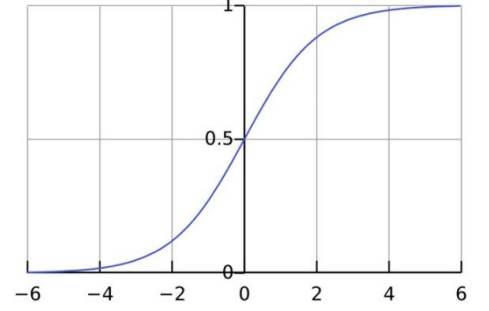

((𝑥𝑤1) + (𝑦𝑤2)) + 𝑐 = 20 + 31 + 4 = 7.
𝑧 = 𝑓(7) = 0.99.

In [3]:
import numpy as np
def sigmoid(x):
    # Функция активации: f(x) = 1 / (1 + e*(-x))
    return 1 / (1 + np.exp(-x))

class Neuron:
    def __init__(self, weights, bias):
        self.weights = weights 
        self.bias = bias
        
    def feedforward(self, inputs):
        total = np.dot(self.weights, inputs) + self.bias 
        
        return sigmoid(total)

weights = np.array([0, 1]) # w1 = 0, w2 = 1 
bias = 4 # = 4
n = Neuron(weights, bias)
x = np.array([2, 3]) # x = 2, y = 3 
print(n.feedforward(x)) # 0.9990889488055994

0.9990889488055994


In [4]:
import numpy as np
class OurNeuralNetwork:
    def __init__(self):
        weights = np.array([0, 1])
        bias = 0 # Класс Neuron из педыдущего раздела
        self.h1 = Neuron(weights, bias) 
        self.h2 = Neuron(weights, bias)
        self.ol = Neuron(weights, bias)
        
    def feedforward(self, x):
        out_h1 = self.h1.feedforward(x) 
        out_h2 = self.h2.feedforward(x) # Входы для o1 - это выходы h1 и h2
        out_ol = self.ol.feedforward(np.array([out_h1, out_h2])) 
        return out_ol
    
network = OurNeuralNetwork() 
x = np.array([2, 3]) 
print(network.feedforward(x)) # 0.7216325609518421

0.7216325609518421


In [5]:
class NeuralNetwork:
    def __init__(self, x, y):
        self.input = x
        self.weights1 = np.random.rand(self.input.shape[1],4)
        self.weights2 = np.random.rand(4,1)
        self.y = y
        self.output = np.zeros(y.shape)
    def feedforward(self):
        self.layer1 = sigmoid(np.dot(self.input, self.weights1))
        self.output = sigmoid(np.dot(self.layer1, self.weights2))
        
    def backprop(self):
        # применение правила цепи для нахождения производной функции потерь по весу2 и весу1 
        d_weights2 = np.dot(self.layer1.T, (2*(self.y - self.output) * sigmoid_derivative(self.output))) 
        d_weights1 = np.dot(self.input.T, (np.dot(2*(self.y - self.output) * sigmoid_derivative(self.output), self.weights2.T) * sigmoid_derivative(self.layer1)))
        # обновление веса производной (наклона) функции потерь
        self.weights1 += d_weights1
        self.weights2 += d_weights2

### Задание

In [6]:
import numpy as np
class OurNeuralNetwork:
    def __init__(self):
        weights = np.array([0.5,0.5,0.5])
        bias = 0
        # класс Neuron из предыдущего раздела
        self.h1 = Neuron(weights, bias)
        self.h2 = Neuron(weights, bias)
        self.h3 = Neuron(weights, bias)
        self.o1 = Neuron(weights, bias)
        
    def feedforward(self, x):
        out_h1 = self.h1.feedforward(x)
        out_h2 = self.h2.feedforward(x)
        out_h3 = self.h3.feedforward(x)
        # входы для о1 - это выходы h1 и h2 и h3
        out_o1 = self.o1.feedforward(np.array([out_h1, out_h2, out_h3]))
        return out_o1

network = OurNeuralNetwork()
x = np.array([2,3,4])
print(network.feedforward(x))

0.8151036049051821


In [7]:
import numpy as np
class OurNeuralNetwork:
    def __init__(self):
        weights = np.array([1,0])
        bias = 1
        # класс Neuron из предыдущего раздела
        self.h1 = Neuron(weights, bias)
        self.h2 = Neuron(weights, bias)
        self.o1 = Neuron(weights, bias)
        self.o2 = Neuron(weights, bias)
        self.o = Neuron(weights, bias)
    def feedforward(self, x):
        out_h1 = self.h1.feedforward(x)
        out_h2 = self.h2.feedforward(x)
        # входы для о1 - это выходы h1 и h2
        out_o1 = self.o1.feedforward(np.array([out_h1, out_h2]))
        out_o2 = self.o2.feedforward(np.array([out_h2, out_h1]))
        out_o = self.o.feedforward(np.array([out_o2, out_o1]))
        return out_o

network = OurNeuralNetwork()
x = np.array([2,3])
print(network.feedforward(x))

0.8671195555587996


### Задание

In [8]:
from cmath import tanh
class NeuralNetwork:
    def __init__(self, x, y):
        self.input = x
        self.weights1 = np.random.rand(self.input.shape[1],4)
        self.weights2 = np.random.rand(4,1)
        self.y = y
        self.output = np.zeros(y.shape)

    def tanh_derivative(self, x):
        return 1 / (1 + np.exp(-x))
    
    def feedforward(self):
        self.layer1 = tanh(np.dot(self.input, self.weights1))
        self.output = tanh(np.dot(self.layer1, self.weights2))
        
    def backprop(self):
        # применение правила цепи для нахождения производной функции потерь по весу2 и весу1
        d_weights2 = np.dot(self.layer1.T, (2*(self.y - self.output) * self.tanh_derivative(self.output)))
        d_weights1 = np.dot(self.input.T, (np.dot(2*(self.y - self.output) * self.tanh_derivative(self.output), self.weights2.T) * self.tanh_derivative(self.layer1)))
        # обновление веса производной (наклона) функции потерь
        self.weights1 += d_weights1
        self.weights2 += d_weights2

In [9]:
from cmath import tanh
class NeuralNetwork:
    def __init__(self, x, y):
        self.input = x
        self.weights1 = np.random.rand(self.input.shape[1],4)
        self.weights2 = np.random.rand(4,1)
        self.y = y
        self.output = np.zeros(y.shape)

    def tanh_derivative(self, x):
        return 1 - tanh(x) * tanh(x)
    
    def feedforward(self):
        self.layer1 = tanh(np.dot(self.input, self.weights1))
        self.output = tanh(np.dot(self.layer1, self.weights2))
        
    def backprop(self):
        # применение правила цепи для нахождения производной функции потерь по весу2 и весу1
        d_weights2 = np.dot(self.layer1.T, (2*(self.y - self.output) * self.tanh_derivative(self.output)))
        d_weights1 = np.dot(self.input.T, (np.dot(2*(self.y - self.output) * self.tanh_derivative(self.output), self.weights2.T) * self.tanh_derivative(self.layer1)))
        # обновление веса производной (наклона) функции потерь
        self.weights1 += d_weights1
        self.weights2 += d_weights2   

In [10]:
from cmath import tanh
class NeuralNetwork:
    def __init__(self, x, y):
        self.input = x
        self.weights1 = np.random.rand(self.input.shape[1],4)
        self.weights2 = np.random.rand(4,1)
        self.y = y
        self.output = np.zeros(y.shape)

    def ReLU_derivative(self, x):
        if x >= 0:
            return 1
        else:
            return 0
        
    def feedforward(self):
        self.layer1 = max(0, np.dot(self.input, self.weights1))
        self.output = max(0, np.dot(self.layer1, self.weights2))
        
    def backprop(self):
        # применение правила цепи для нахождения производной функции потерь по весу2 и весу1
        d_weights2 = np.dot(self.layer1.T, (2*(self.y - self.output) * self.ReLU_derivative(self.output)))
        d_weights1 = np.dot(self.input.T, (np.dot(2*(self.y - self.output) * self.ReLU_derivative(self.output), self.weights2.T) * self.ReLU_derivative(self.layer1)))
        # обновление веса производной (наклона) функции потерь
        self.weights1 += d_weights1
        self.weights2 += d_weights2

# Введение в нейронные сети с помощью Scikit-Learn в Python

Теперь мы знаем, что такое нейронные сети и какие шаги необходимо
выполнить, чтобы построить простую нейронную сеть с плотными связями.
В этом разделе мы попытаемся построить простую нейронную сеть, которая
предсказывает класс, к которому принадлежит данное растение ириса. Мы
будем использовать библиотеку Python Scikit-Learn для создания нашей
нейронной сети.

Sklearn предоставляет 2 оценщика для задач классификации и
регрессии соответственно:

- MLPClassifier
- MLPRegressor

Начнем с импорта необходимых библиотек

In [11]:
#Загрузка библиотек import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import sklearn
import numpy as np

Загрузка данных

Мы будем загружать два набора данных.

Набор данных цифр: мы будем использовать набор данных цифр,
который имеет изображения размером 8x8 для цифр 0-9. Ниже мы будем
использовать цифровые данные для задач классификации.

Набор данных о жилье в Бостоне: мы будем использовать набор
данных о жилье в Бостоне, который содержит информацию о различных
свойствах дома, таких как среднее количество комнат, уровень преступности
на душу населения в городе и т. д. Мы будем использовать его для задач
регрессии.

Sklearn предоставляет оба этих набора данных. Мы можем загрузить
их, вызвав методы load_digits() и load_boston().

In [12]:
from sklearn.datasets import load_digits, load_boston
digits = load_digits()
X_digits, Y_digits = digits.data, digits.target
print('Dataset Sizes : ', X_digits.shape, Y_digits.shape)

Dataset Sizes :  (1797, 64) (1797,)


In [13]:
boston = load_boston() 
X_boston, Y_boston = boston.data, boston.target 
print('Dataset Sizes : ', X_boston.shape, Y_boston.shape)

Dataset Sizes :  (506, 13) (506,)


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function load_boston is deprecated; `load_boston` is deprecated in 1.0 and will be removed in 1.2.

    The Boston housing prices dataset has an ethical problem. You can refer to
    the documentation of this function for further details.

    The scikit-learn maintainers therefore strongly discourage the use of this
    dataset unless the purpose of the code is to study and educate about
    ethical issues in data science and machine learning.

    In this special case, you can fetch the dataset from the original
    source::

        import pandas as pd
        import numpy as np


        data_url = "http://lib.stat.cmu.edu/datasets/boston"
        raw_df = pd.read_csv(data_url, sep="\s+", skiprows=22, header=None)
        data = np.hstack([raw_df.values[::2, :], raw_df.values[1::2, :2]])
        target = raw_df.values[1::2, 2]

    Alternative datasets include the California housing dataset (

# Классификация

MLPClassifier — это клвсс, доступный как часть модуля neuro_network
sklearn для выполнения задач классификации с использованием
многослойного персептрона.

Как обычно разделим набор данных на две части:

- данные обучения, которые будут использоваться для модели обучения;
- тестовые данные, по которым будет проверяться точность обученной модели.

Функция train_test_split модуля model_selection sklearn поможет нам
разделить данные на два набора: 80% для обучения и 20% для тестирования.

Мы также используем seed(random_state=123) с train_test_split, чтобы мы
всегда получали одно и то же разделение и могли сравнивать и
воспроизволить результаты в будущем.

In [14]:
from sklearn.model_selection import train_test_split
X_train, X_test, Y_train, Y_test = train_test_split(X_digits, Y_digits, train_size=0.80, test_size=0.20, stratify=Y_digits, random_state=123) 
print('Train/Test Sizes : ', X_train.shape, X_test.shape, Y_train.shape, Y_test.shape)

Train/Test Sizes :  (1437, 64) (360, 64) (1437,) (360,)


In [15]:
from sklearn.neural_network import MLPClassifier
mlp_classifier = MLPClassifier(random_state=123) 
mlp_classifier.fit(X_train, Y_train)

MLPClassifier(random_state=123)

In [16]:
Y_preds = mlp_classifier.predict(X_test)
print(Y_preds[:15])
print(Y_test[:15])
## Метод Score для оценки точности моделей классификации.
print('Test Accuracy : %.3f'%mlp_classifier.score(X_test, Y_test))
print('Training Accuracy : %.3f'%mlp_classifier.score(X_train, Y_train))

[5 9 9 6 1 6 6 9 8 7 4 2 1 4 3]
[5 9 9 6 1 6 6 9 8 7 4 2 1 4 3]
Test Accuracy : 0.983
Training Accuracy : 1.000


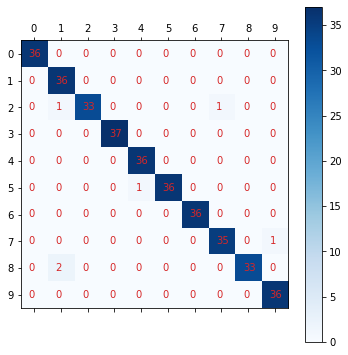

In [17]:
from sklearn.metrics import confusion_matrix
def plot_confusion_matrix(Y_test, Y_preds):
    conf_mat = confusion_matrix(Y_test, Y_preds) #print(conf_mat)
    fig = plt.figure(figsize=(6,6))
    plt.matshow(conf_mat, cmap=plt.cm.Blues, fignum=1)
    plt.yticks(range(10), range(10))
    plt.xticks(range(10), range(10))
    plt.colorbar();
    for i in range(10):
        for j in range(10):
            plt.text(i-0.2,j+0.1, str(conf_mat[j, i]), color='tab:red')
plot_confusion_matrix(Y_test, mlp_classifier.predict(X_test))

In [18]:
print("Loss : ", mlp_classifier.loss_)
print("Number of Coefs : ", len(mlp_classifier.coefs_))
print("Number of Intercepts : ", len(mlp_classifier.intercepts_)) 
print("Number of Iterations for Which Estimator Ran : ", mlp_classifier.n_iter_) 
print("Name of Output Layer Activation Function : ", mlp_classifier.out_activation_)

Loss :  0.003472868499418059
Number of Coefs :  2
Number of Intercepts :  2
Number of Iterations for Which Estimator Ran :  125
Name of Output Layer Activation Function :  softmax


In [19]:
X_train, X_test, Y_train, Y_test = train_test_split(X_boston, Y_boston, train_size=0.80, test_size=0.20, random_state=123) 
print("Train/Test Sizes :", X_train.shape, X_test.shape, Y_train.shape, Y_test.shape)

Train/Test Sizes : (404, 13) (102, 13) (404,) (102,)


In [20]:
from sklearn.neural_network import MLPRegressor
mlp_regressor = MLPRegressor(random_state=123) 
mlp_regressor.fit(X_train, Y_train)

MLPRegressor(random_state=123)

In [21]:
Y_preds = mlp_regressor.predict(X_test)
print(Y_preds[:10])
print(Y_test[:10])
## Метод Score оценивает точность моделей классификации.
print('Test R*2 Score : %.3f'%mlp_regressor.score(X_test, Y_test)) 
print('Training R*2 Score : %.3f'%mlp_regressor.score(X_train, Y_train))

[ 7.32543601 24.33417853 32.46700507 15.19086054 25.6749167  25.07797685
 27.20985668  2.62269853 15.25691994 28.02637784]
[15.  26.6 45.4 20.8 34.9 21.9 28.7  7.2 20.  32.2]
Test R*2 Score : 0.462
Training R*2 Score : 0.510


In [22]:
print("Loss : ", mlp_regressor.loss_)

print("Number of Coefs : ", len(mlp_regressor.coefs_)) 
[weights.shape for weights in mlp_regressor.coefs_]

Loss :  28.538174061119598
Number of Coefs :  2


[(13, 100), (100, 1)]

In [23]:
print("Number of Iterations for Which Estimator Ran : ", mlp_regressor.n_iter_)

print("Name of Output Layer Activation Function : ", mlp_regressor.out_activation_)

Number of Iterations for Which Estimator Ran :  130
Name of Output Layer Activation Function :  identity


### Задание

In [24]:
url = r'https://gist.githubusercontent.com/netj/8836201/raw/6f9306ad21398ea43cba4f7d537619d0e07d5ae3/iris.csv'

data = pd.read_csv(url)

X_train, X_test, y_train, y_test = train_test_split(
    data.iloc[:,:-1],    # все колонки кроме последней - в признаки
    data.iloc[:,-1], # последнюю в целевую переменную (класс)
    test_size = 0.20 # размер тестовой выборки 20%
)
X_train.shape, X_test.shape, y_train.shape, y_test.shape

from sklearn.neural_network import MLPClassifier
mlp_classifier = MLPClassifier(random_state=123)
mlp_classifier.fit(X_train, y_train)

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:692: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


MLPClassifier(random_state=123)

In [25]:
Y_preds = mlp_classifier.predict(X_test)

print(Y_preds[:15])
print(y_test[:15])
## ммтедо Score для оценки точности моделей классификации
print('Test Accurancy: %.3f'%mlp_classifier.score(X_test, y_test))
print('Training Accurancy: %.3f'%mlp_classifier.score(X_train, y_train))

['Virginica' 'Virginica' 'Versicolor' 'Versicolor' 'Setosa' 'Virginica'
 'Versicolor' 'Versicolor' 'Setosa' 'Virginica' 'Setosa' 'Virginica'
 'Versicolor' 'Virginica' 'Setosa']
100     Virginica
134     Virginica
78     Versicolor
75     Versicolor
26         Setosa
146     Virginica
76     Versicolor
94     Versicolor
35         Setosa
135     Virginica
40         Setosa
111     Virginica
82     Versicolor
102     Virginica
20         Setosa
Name: variety, dtype: object
Test Accurancy: 0.967
Training Accurancy: 0.967


In [26]:
print("Loss: ", mlp_classifier.loss_)
print("Number of coefs: ", len(mlp_classifier.coefs_))
print("Number of intercepts: ", len(mlp_classifier.intercepts_))
print("Number of iterations for which estimator ran: ", mlp_classifier.n_iter_)
print("Name of output layer activation function: ", mlp_classifier.out_activation_)

Loss:  0.3137359387262988
Number of coefs:  2
Number of intercepts:  2
Number of iterations for which estimator ran:  200
Name of output layer activation function:  softmax


### Задание

In [32]:
url = r'https://raw.githubusercontent.com/AnnaShestova/salary-years-simple-linear-regression/master/Salary_Data.csv'

data = pd.read_csv(url)

X_train, X_test, y_train, y_test = train_test_split(
    data.iloc[:,:-1].values,    # все колонки кроме последней - в признаки
    data.iloc[:,-1].values, # последнюю в целевую переменную (класс)
    test_size = 0.20, # размер тестовой выборки 20%
    random_state=123
)
print(X_train.shape, X_test.shape, y_train.shape, y_test.shape)

from sklearn.neural_network import MLPRegressor
mlp_regressor = MLPRegressor(random_state=123)
mlp_regressor.fit(X_train, y_train)

(24, 1) (6, 1) (24,) (6,)


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:692: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


MLPRegressor(random_state=123)

In [35]:
Y_preds = mlp_regressor.predict(X_test)

print(Y_preds[:10])
print(y_test[:10])
# Score для оценки точности моделей классификации
print('Test R^2: %.3f'%mlp_regressor.score(X_test, y_test))
print('Training R^2: %.3f'%mlp_regressor.score(X_train, y_train))

[20.26234628 55.2781752  18.82135812 50.48274487 20.26234628 50.9622879 ]
[ 54445. 121872.  56642. 116969.  64445. 112635.]
Test R^2: -8.796
Training R^2: -8.261


In [34]:
print("Loss: ", mlp_regressor.loss_)
print("Number of coefs: ", len(mlp_regressor.coefs_))
print("Number of intercepts: ", len(mlp_regressor.intercepts_))
print("Number of iterations for which estimator ran: ", mlp_regressor.n_iter_)
print("Name of output layer activation function: ", mlp_regressor.out_activation_)

Loss:  2988058032.1601596
Number of coefs:  2
Number of intercepts:  2
Number of iterations for which estimator ran:  200
Name of output layer activation function:  identity
